In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore") 

## Importing Libraries And Loading the Dataset

In [2]:
df = pd.read_csv("data/students_adaptability_level_online_education.csv")
df.head()

,Education Level,Institution Type,Gender,Age,Device,IT Student,Location,Financial Condition,Internet Type,Network Type,Flexibility Level
0,University,Private,Male,23,Tab,No,Town,Mid,Wifi,4G,Moderate
1,University,Private,Female,23,Mobile,No,Town,Mid,Mobile Data,4G,Moderate
2,College,Public,Female,18,Mobile,No,Town,Mid,Wifi,4G,Moderate
3,School,Private,Female,11,Mobile,No,Town,Mid,Mobile Data,4G,Moderate
4,School,Private,Female,18,Mobile,No,Town,Poor,Mobile Data,3G,Low


Exploring dataset

In [3]:
def explore_dataset(data):
    print(f"1. Dimentions of the Dataset : {data.shape}\n")
    print(f"2. Features in Dataset : \n{data.columns}\n")
    print(f"3. Duplicated count : {data.duplicated().sum()}\n")
    print(f"4. Info : \n{data.info()}\n")
    print(f"5. Deccribe : \n{data.describe()}\n")


In [4]:
explore_dataset(df)

1. Dimentions of the Dataset : (1205, 11)

2. Features in Dataset : 
Index(['Education Level', 'Institution Type', 'Gender', 'Age', 'Device',
       'IT Student', 'Location', 'Financial Condition', 'Internet Type',
       'Network Type', 'Flexibility Level'],
      dtype='object')

3. Duplicated count : 980

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Education Level      1205 non-null   object
 1   Institution Type     1205 non-null   object
 2   Gender               1205 non-null   object
 3   Age                  1205 non-null   int64 
 4   Device               1205 non-null   object
 5   IT Student           1205 non-null   object
 6   Location             1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   ob

In [5]:
# unique data count in each feature
df.nunique()

Education Level        3
Institution Type       2
Gender                 2
Age                    6
Device                 3
IT Student             2
Location               2
Financial Condition    3
Internet Type          2
Network Type           3
Flexibility Level      3
dtype: int64

In [6]:
# remove all duplites
# df = df.drop_duplicates()
# df.duplicated().sum()

## visualizations

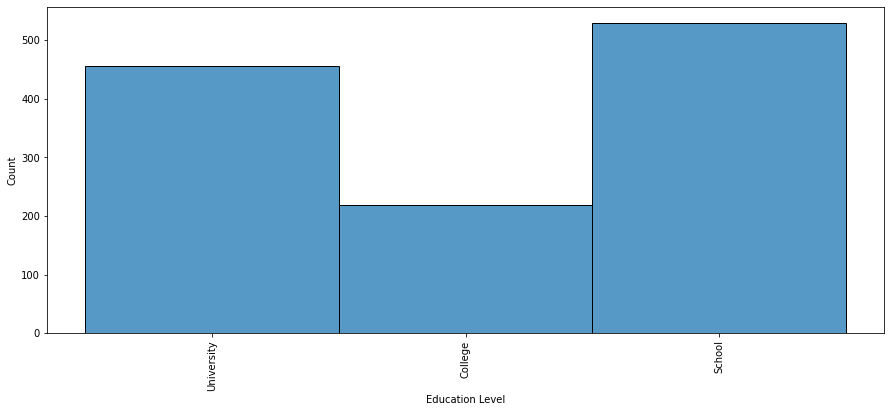

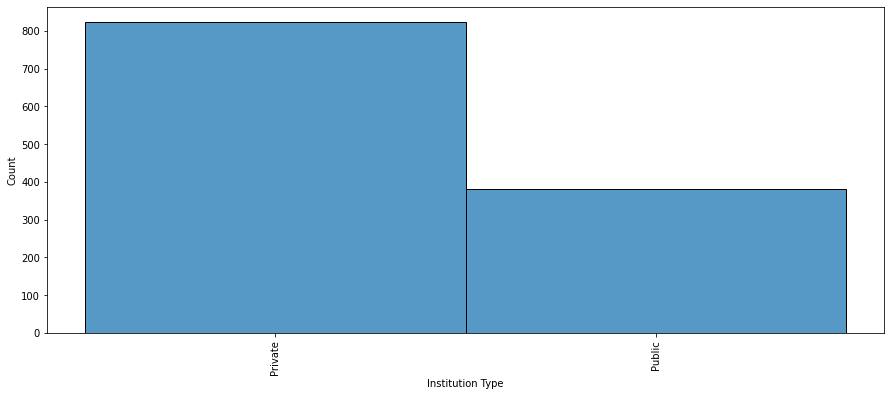

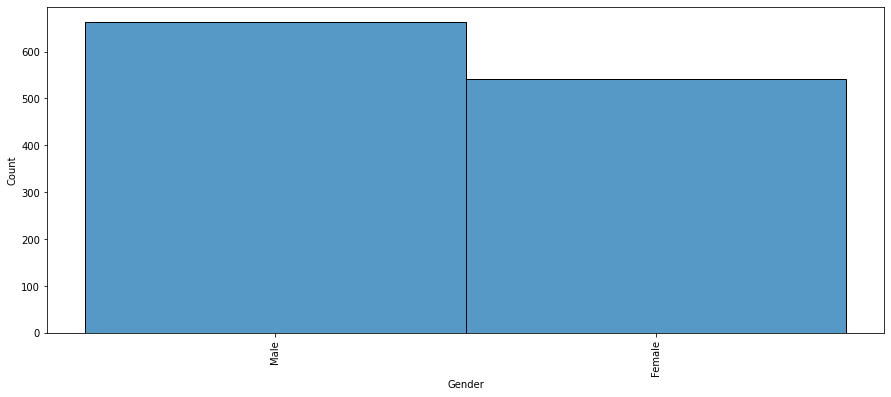

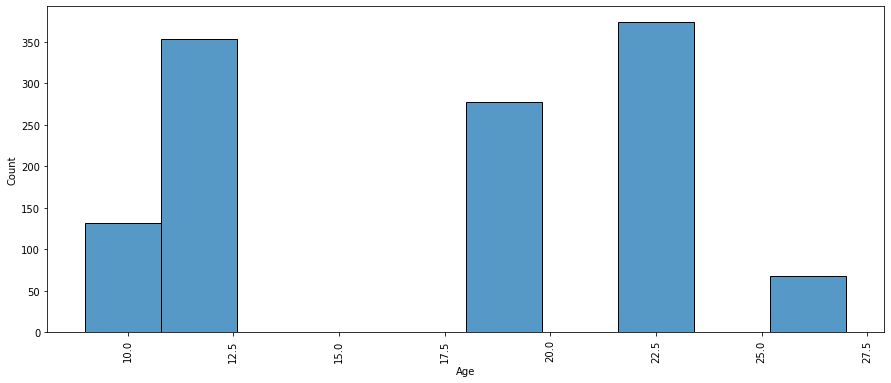

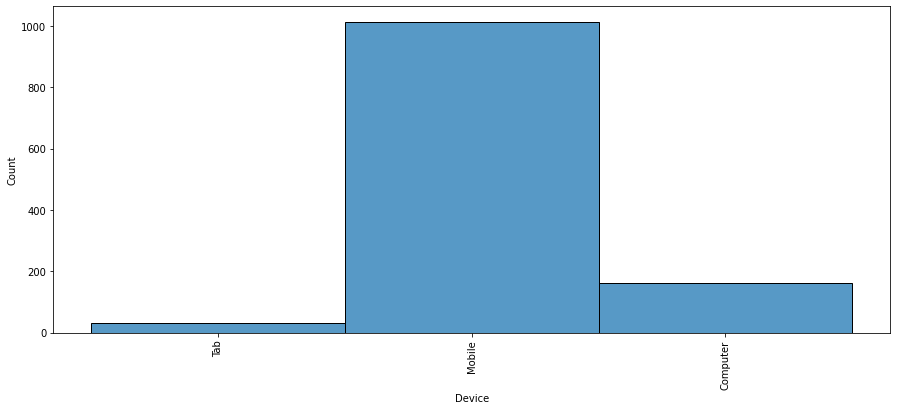

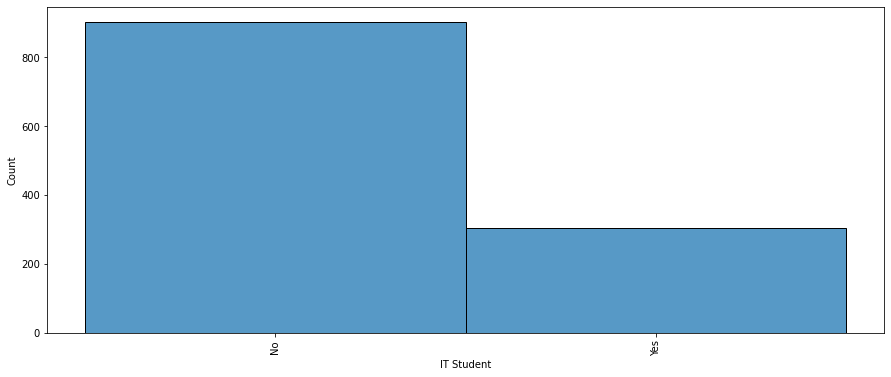

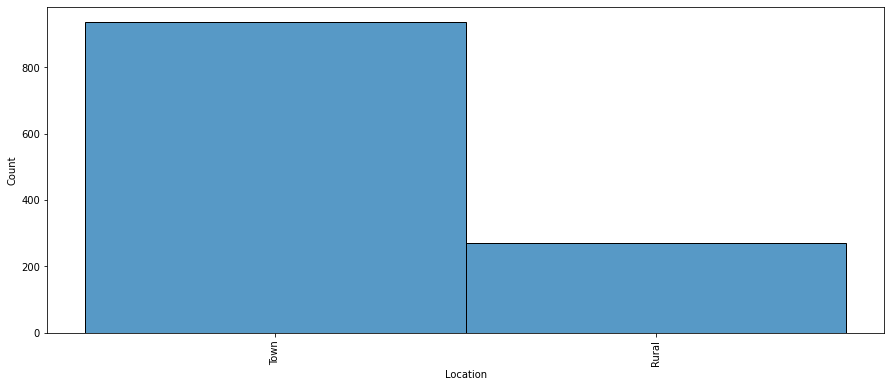

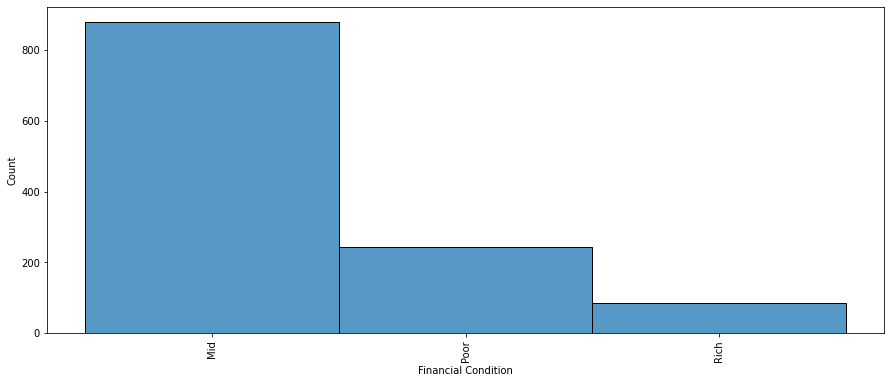

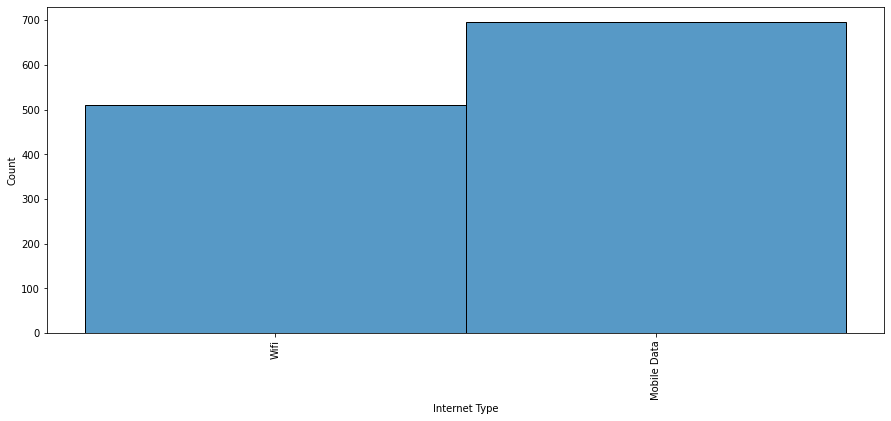

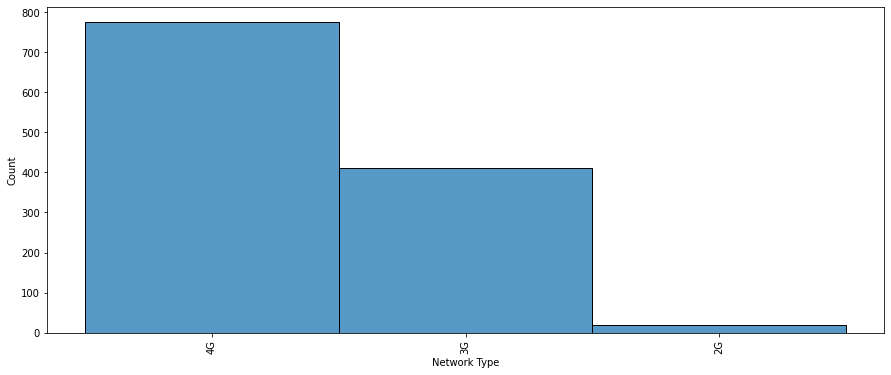

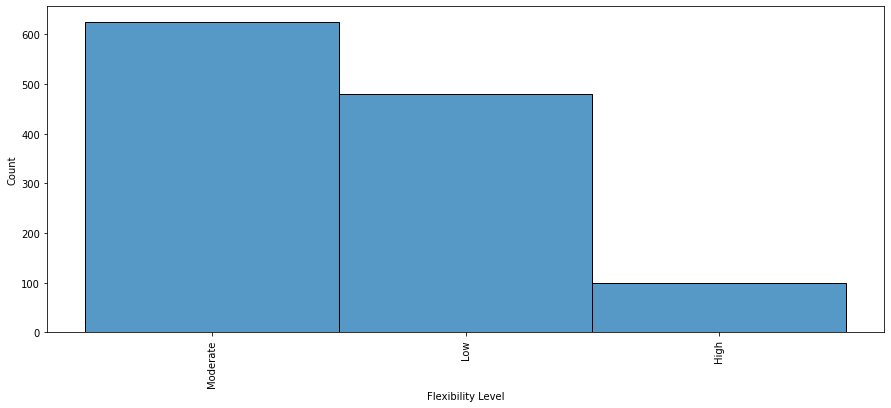

In [7]:
for i in df.columns:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], bins=10)
    plt.xticks(rotation = 90)
    plt.show()

from above visualization we will be able to get idea about data destribution in each feature

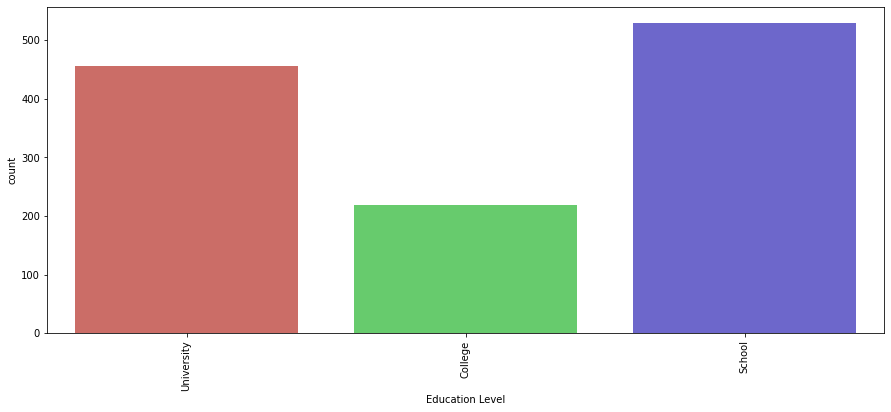

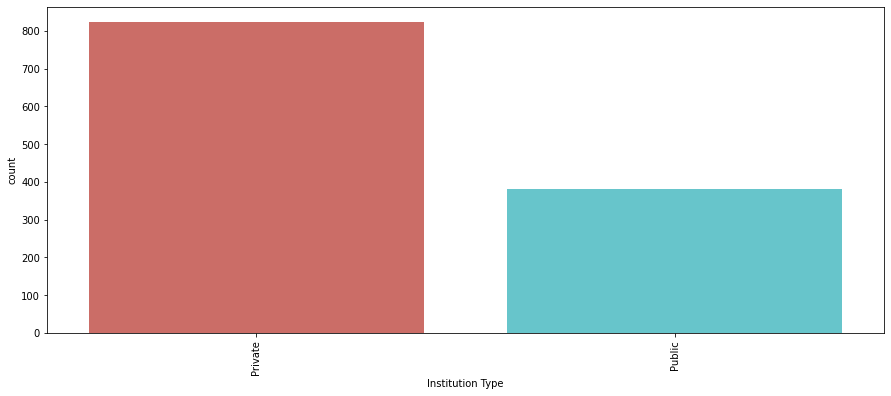

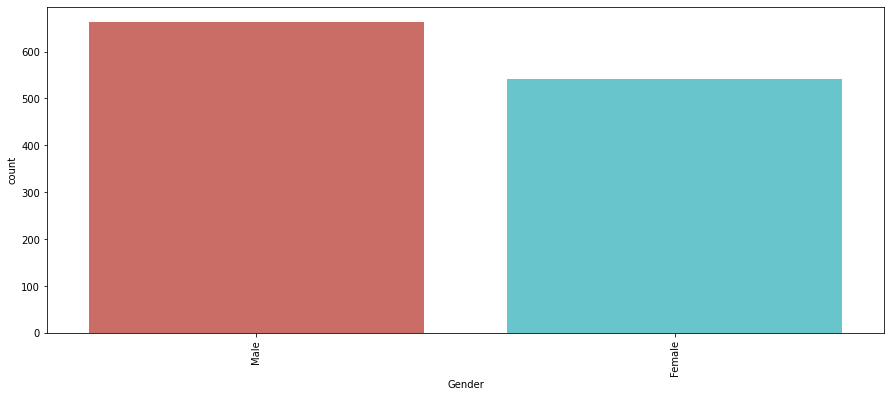

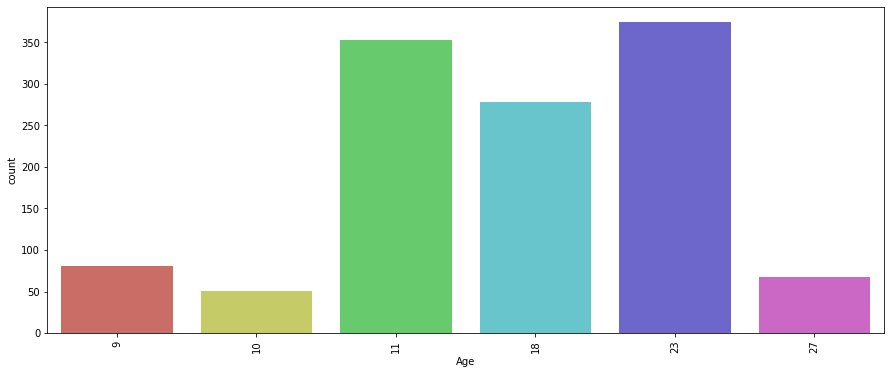

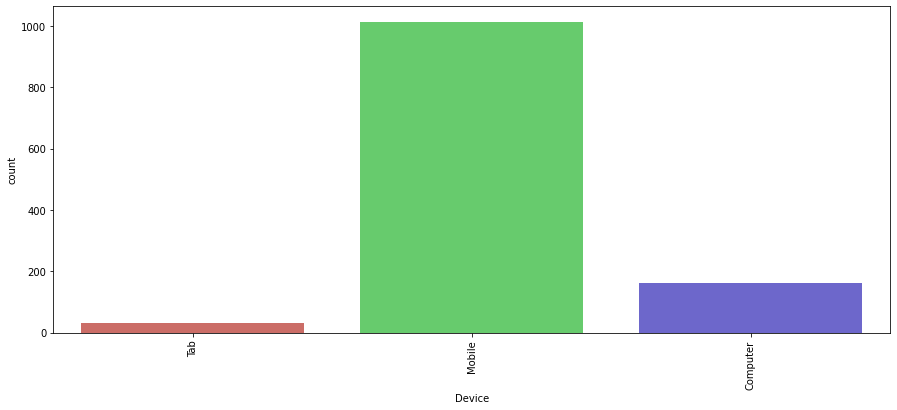

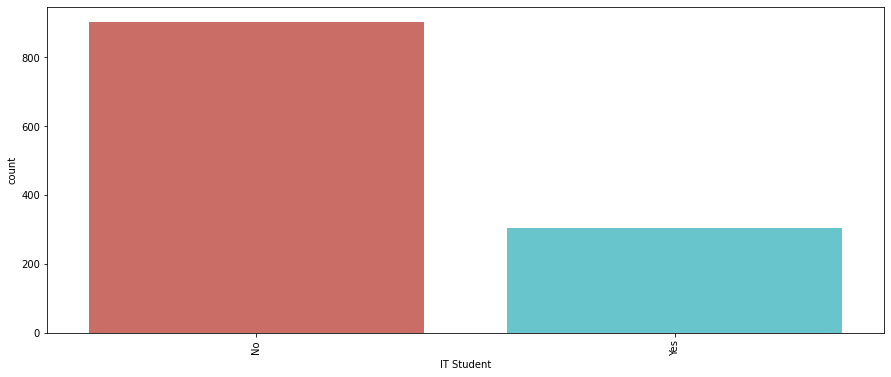

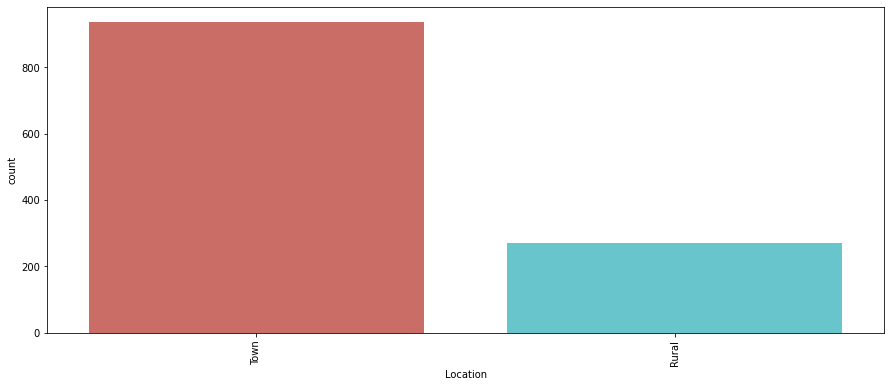

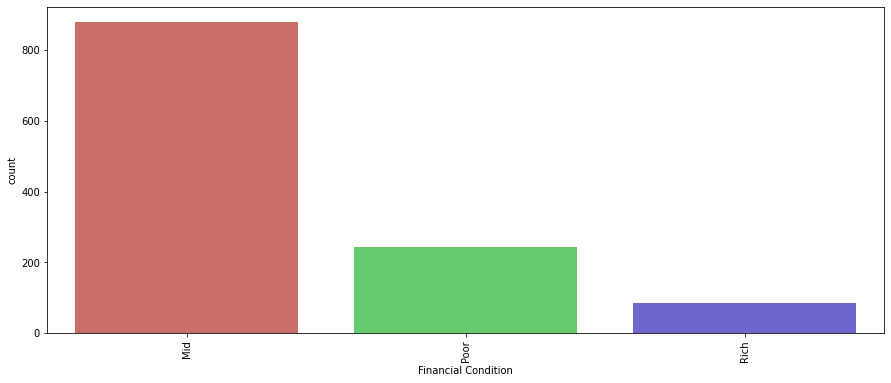

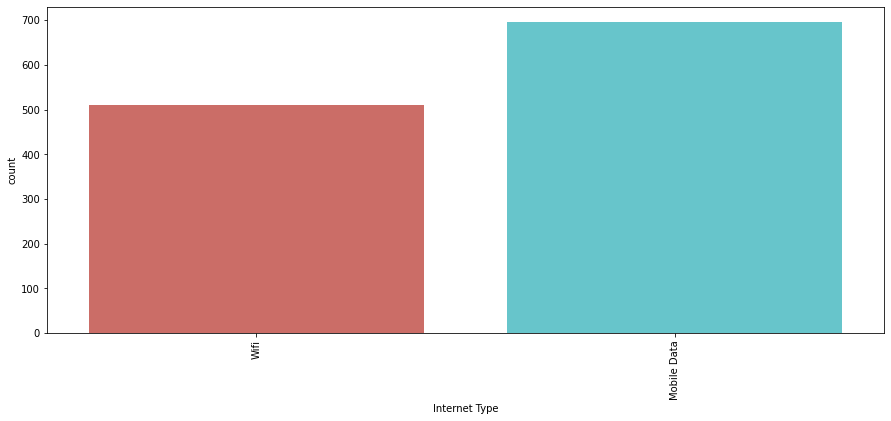

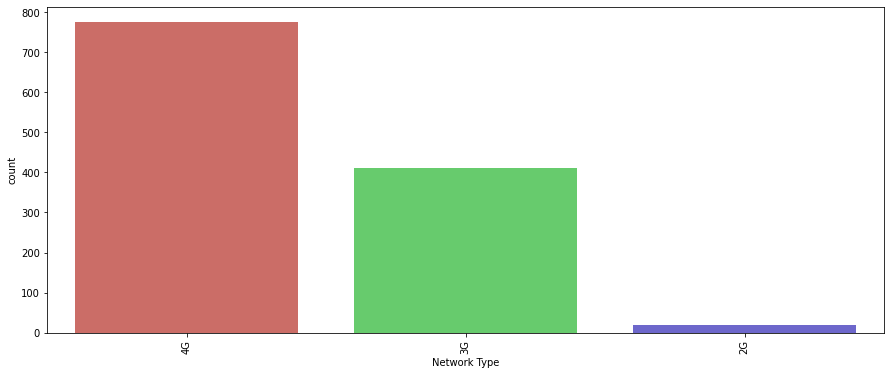

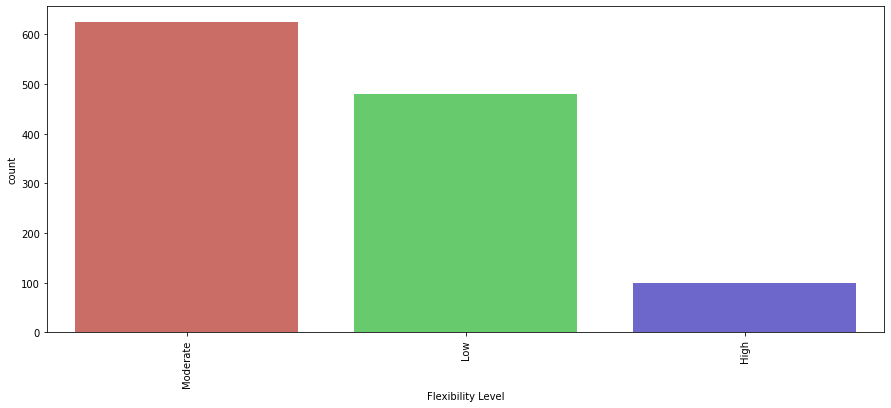

In [8]:
for i in df.columns:
    plt.figure(figsize=(15,6))
    sns.countplot(df[i], data = df, palette='hls')
    plt.xticks(rotation = 90)
    plt.show()

Age destribution

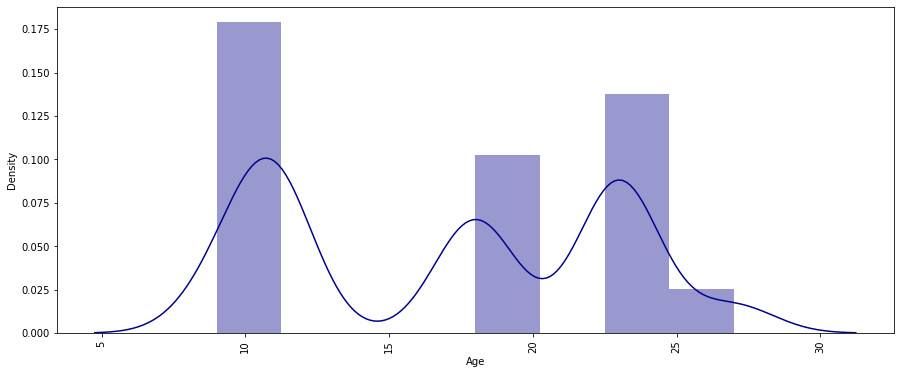

In [9]:
plt.figure(figsize=(15,6))
sns.distplot(df['Age'], kde = True, color = 'Darkblue')
plt.xticks(rotation = 90)
plt.show()

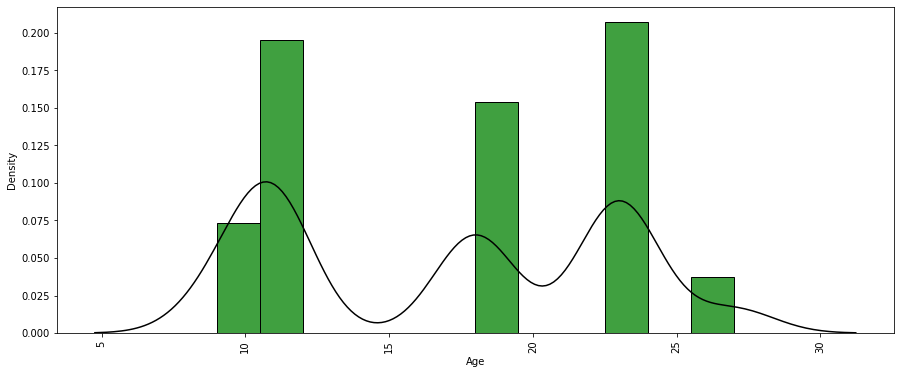

In [10]:
plt.figure(figsize=(15,6))
sns.histplot(df["Age"], stat='density', color='green')
sns.kdeplot(df["Age"], color='black')
plt.xticks(rotation = 90)
plt.show()

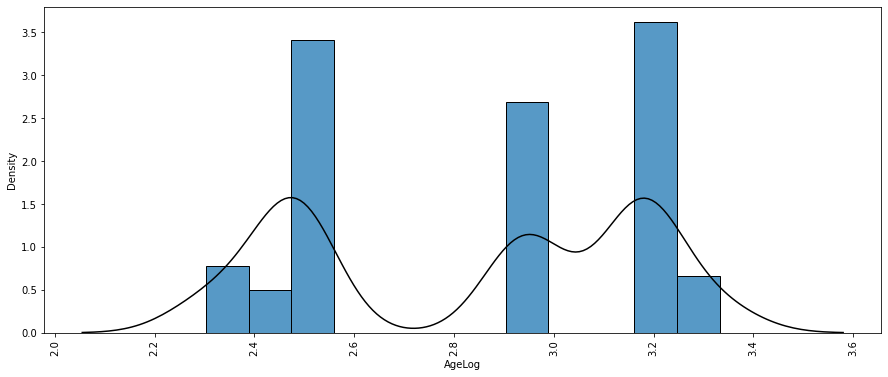

In [11]:
plt.figure(figsize=(15,6))
df['AgeLog'] = np.log(df['Age']+1)
sns.histplot(df["AgeLog"], stat='density')
sns.kdeplot(df["AgeLog"], color='black')
plt.xticks(rotation = 90)
plt.show()

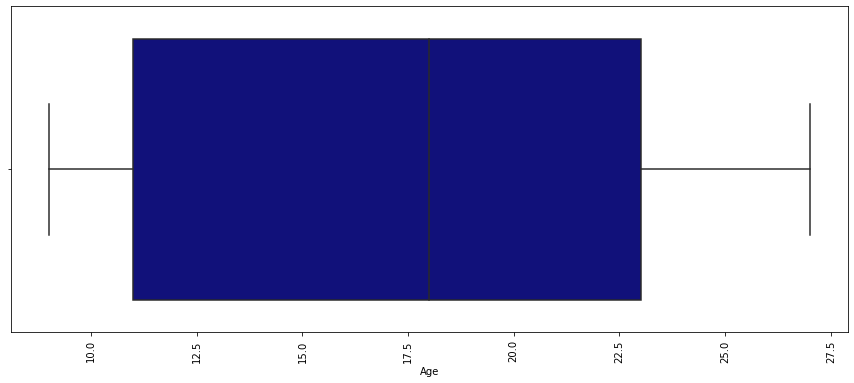

In [12]:
plt.figure(figsize=(15,6))
sns.boxplot(df['Age'],color = 'Darkblue')
plt.xticks(rotation = 90)
plt.show()

## Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder
label_encder = LabelEncoder()

In [14]:
df["Flexibility Level"] = label_encder.fit_transform(df["Flexibility Level"])

In [15]:
categorical_columns = [col for col in df.drop(["Flexibility Level"], axis=1).columns if df[col].dtype==object]

In [16]:
categorical_columns

['Education Level',
 'Institution Type',
 'Gender',
 'Device',
 'IT Student',
 'Location',
 'Financial Condition',
 'Internet Type',
 'Network Type']

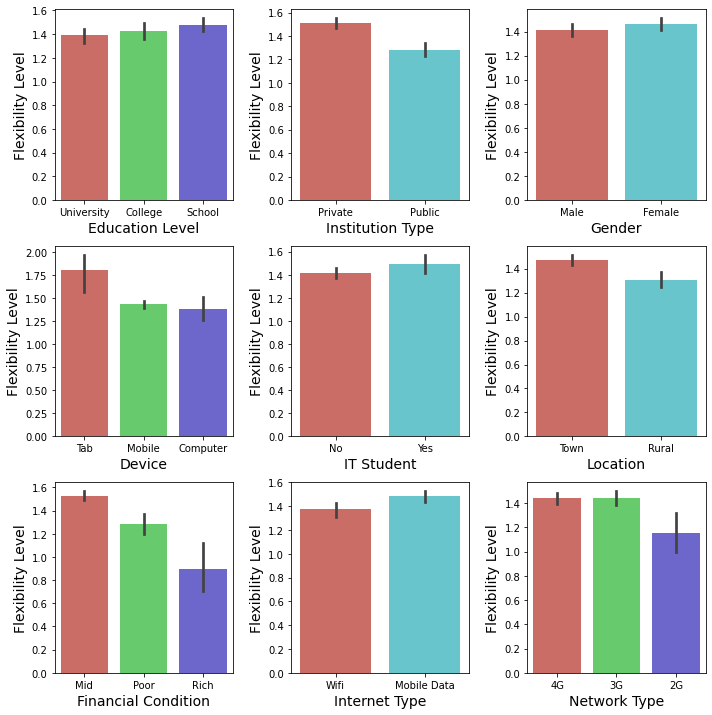

In [17]:
fig, axes = plt.subplots(3, 3, figsize=(10,10))
axes = [ax for axes_row in axes for ax in axes_row]
target = 'Flexibility Level'

for i, c in enumerate(categorical_columns):
    sns.barplot(df[c], df[target], ax=axes[i], palette = 'hls')
    axes[i].set_ylabel('Flexibility Level', fontsize=14)
    axes[i].set_xlabel(c, fontsize=14)
plt.tight_layout()
plt.show()


In [18]:
#encoding all features
for column in categorical_columns:
    df[column] = label_encder.fit_transform(df[column])


In [19]:
df.head()

,Education Level,Institution Type,Gender,Age,Device,IT Student,Location,Financial Condition,Internet Type,Network Type,Flexibility Level,AgeLog
0,2,0,1,23,2,0,1,0,1,2,2,3.178054
1,2,0,0,23,1,0,1,0,0,2,2,3.178054
2,0,1,0,18,1,0,1,0,1,2,2,2.944439
3,1,0,0,11,1,0,1,0,0,2,2,2.484907
4,1,0,0,18,1,0,1,1,0,1,1,2.944439


In [20]:
X = df.drop(["Flexibility Level", "AgeLog"], axis=1)
y =  df["Flexibility Level"]

In [21]:
X.head()

,Education Level,Institution Type,Gender,Age,Device,IT Student,Location,Financial Condition,Internet Type,Network Type
0,2,0,1,23,2,0,1,0,1,2
1,2,0,0,23,1,0,1,0,0,2
2,0,1,0,18,1,0,1,0,1,2
3,1,0,0,11,1,0,1,0,0,2
4,1,0,0,18,1,0,1,1,0,1


In [22]:
y.head()

0    2
1    2
2    2
3    2
4    1
Name: Flexibility Level, dtype: int32

In [23]:
X.shape

(1205, 10)

In [24]:
y.shape

(1205,)

## Model Building

scaling

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
standered_scaler = StandardScaler()
X_train = standered_scaler.fit_transform(X_train)
X_test = standered_scaler.fit_transform(X_test)

decisiontree classifier

In [28]:
decision_tree = DecisionTreeClassifier()

In [29]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
predictions = decision_tree.predict(X_test)

In [31]:
print("Training Accuracy :", decision_tree.score(X_train, y_train))
print("Testing Accuracy :", decision_tree.score(X_test, y_test))

Training Accuracy : 0.8568464730290456
Testing Accuracy : 0.8464730290456431


In [32]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.57      0.68        23
           1       0.85      0.90      0.87       103
           2       0.84      0.85      0.85       115

    accuracy                           0.85       241
   macro avg       0.85      0.77      0.80       241
weighted avg       0.85      0.85      0.84       241



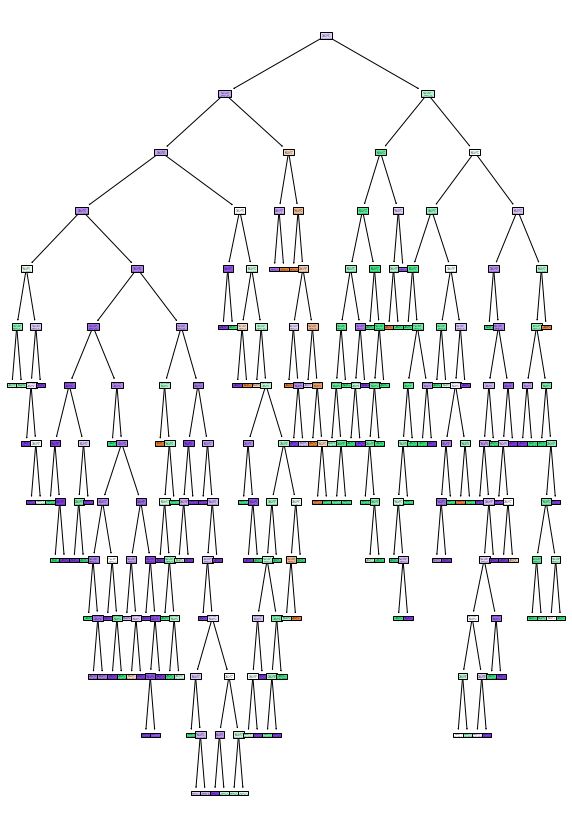

In [33]:
plt.figure(figsize=(10,15))
tree.plot_tree(decision_tree, filled=True)
plt.show()

In [34]:
decision_tree.feature_importances_

array([0.12079883, 0.09384312, 0.09447903, 0.16153499, 0.04824924,
       0.04113115, 0.12242263, 0.13563095, 0.06500647, 0.1169036 ])

Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
randomforest_classifier = RandomForestClassifier(n_estimators= 10,criterion="entropy")

In [37]:
randomforest_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [38]:
y_predictions = randomforest_classifier.predict(X_test)

In [39]:
print("Training Accuracy :", randomforest_classifier.score(X_train, y_train))
print("Testing Accuracy :", randomforest_classifier.score(X_test, y_test))

Training Accuracy : 0.8558091286307054
Testing Accuracy : 0.8340248962655602


In [40]:
print(classification_report(y_test, y_predictions))


              precision    recall  f1-score   support

           0       0.87      0.57      0.68        23
           1       0.83      0.88      0.86       103
           2       0.83      0.84      0.84       115

    accuracy                           0.83       241
   macro avg       0.84      0.76      0.79       241
weighted avg       0.84      0.83      0.83       241

